## Execute the project and pip the result into txt file

In [73]:
import sys
import os
os.system("dotnet run --project APITest > analysis.txt")

0

## Process the result

In [74]:
file = open('analysis.txt','r')
result = file.read().split('\n')
file.close()

## Depend on the result and plot the scatter diagram

In [90]:
x = []
y = []
for i in range(len(result)):
    raw = result[i] 
    raw = list(filter((lambda x :  x != "" ),raw.split('-')))
    if('bytes' in raw):
        bb = raw[0]
        continue
    if len(raw) == 0:
        continue
    x.append(bb)
    y.append(raw[0])

final = [[],[],[]]
axis = []
for i in range(len(y)):
    final[i%3].append(y[i])
    if i % 3 == 0:
        axis.append(x[i])
print(final)
print(axis)


[['0.063', '0.002', '0.002', '0', '0', '0.001', '0', '0.001'], ['0.103', '0.002', '0', '0.008', '0.004', '0', '0.003', '0.001'], ['0.079', '0.001', '0', '0', '0.003', '0.011', '0.003', '0.001']]
['5', '10', '20', '100', '500', '1024', '2048', '4048']


## Plot the result

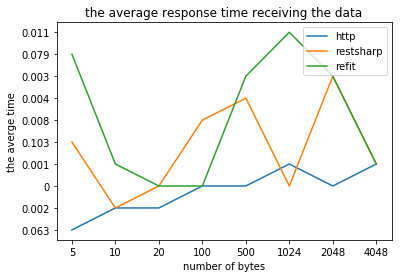

In [109]:
import matplotlib.pyplot as plt



for i in range(len(final)):
     plt.plot(axis,final[i],label=labels[i])

        
plt.xlabel('number of bytes')
plt.ylabel('the averge time')
plt.title('the average response time receiving the data')
labels = ['http','restsharp','refit']

plt.legend(loc='upper right')
plt.savefig('plot.png')
plt.show()